In [0]:
#import libraries
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score

In [4]:
#Second Dataset: Breast Cancer - medium size
#column 0 is ID number which will not influence cancer
#B=Benign M=Malign
breast_cancer = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',header=None)
del breast_cancer[0]
print(breast_cancer.head())
breast_cancer.shape

  1      2      3       4       5        6        7       8        9       10  \
0  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430  0.1809   

   ...     22     23      24      25      26      27      28      29      30  \
0  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654  0.4601   
1  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860  0.2750   
2  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430  0.3613   
3  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575  0.6638   
4  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625  0.2364   

        31  
0  0.11890  
1  0.0

(569, 31)

In [0]:
y=[]
for i in breast_cancer[1]:
    if i=='B':
        i=1
        y.append(i)
    elif i=='M':
        i=2
        y.append(i)
breast_cancer=breast_cancer.copy()
del breast_cancer[1]
X=breast_cancer

In [16]:
print('class 1: ',y.count(1))
print('class 2: ',y.count(2))

class 1:  357
class 2:  212


In [17]:
c=0
for i in y:
  if i==1:
    c=c+1
print(c
     
     )
# Import train_test_split function
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 100) # 70% training and 30% test

357


In [63]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

import time

start_rf = time.clock()

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=1000)

#Train the model using the training sets y_cancer_pred=clf_cancer.predict(X_cancer_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

end_rf=time.clock()

print("-----Random Forest, without distillation-------")
print("running time: ",end_rf - start_rf)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Model Accuracy, without distillation
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))

#CV Score, without distillation
print('cv_score: ',cross_val_score(clf, X_train, y_train, cv=5).mean())

-----Random Forest, without distillation-------
running time:  1.414557000000002
Accuracy:  0.9532163742690059
cv_score:  0.954778481012658


In [19]:
#probability
pro=clf.predict_proba(X)
pro

array([[0.026, 0.974],
       [0.052, 0.948],
       [0.   , 1.   ],
       ...,
       [0.012, 0.988],
       [0.   , 1.   ],
       [0.995, 0.005]])

In [20]:
hist=np.histogram(pro, bins=10)
hist

(array([496,  37,  18,  11,   7,   7,  11,  16,  39, 496]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

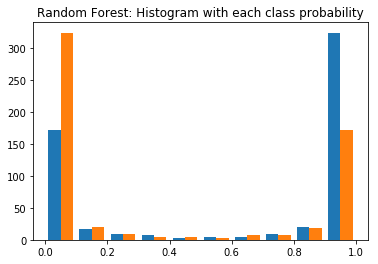

In [21]:
plt.hist(pro, bins=10)  # arguments are passed to np.histogram
plt.title("Random Forest: Histogram with each class probability")
plt.show()

In [0]:
#probability of class 1
pro_1=[]
for i in pro:
    pro_1.append(i[0])

In [23]:
hist_1=np.histogram(pro_1, bins =[0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])
hist_1

(array([172,  17,   9,   7,   3,   4,   4,   9,  20, 324]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

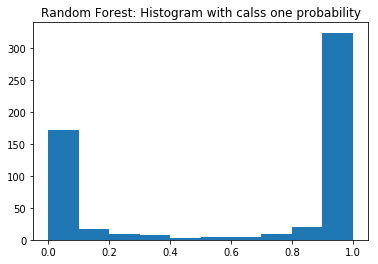

In [24]:
plt.hist(pro_1, bins=[0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])
plt.title("Random Forest: Histogram with calss one probability")
plt.show()

In [25]:
#calculate the number of class1 and class2 after binning
class_1=0
for i in pro_1:
  if i>0.5:
    class_1=class_1+1

print("---class distribution after random forest disllation---")
print('class 1: ',class_1)
class_2=len(pro_1)-class_1
print('class_2: ',class_2)

---class distribution after random forest disllation---
class 1:  361
class_2:  208


In [27]:
#new dataset
new_y=[]
new_X=X
for i in pro:
    for j in range(11): 
        if not j==10:
            if j==0: # 0 and 1 exist
                if i[0]>=hist_1[1][j] and i[0]<=hist_1[1][j+1]: #i[0]=class 1 pro  hist[1]_1=class 1 bin edge
                    class_value=j+1
                    new_y.append(class_value)
            else:
                if i[0]>hist_1[1][j] and i[0]<=hist_1[1][j+1]: #i[0]=class 1 pro  hist[1]_1=class 1 bin edge
                    class_value=j+1  
                    #print(class_value)
                    new_y.append(class_value)
new_y=np.array(new_y)
new_y

array([ 1,  1,  1,  2,  1,  2,  1,  2,  1,  1,  2,  1,  1,  2,  1,  1,  1,
        1,  1, 10, 10, 10,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  2, 10,  3,  2, 10,  7,  1,  2,  2,  1, 10,  1, 10, 10, 10,
       10, 10,  1,  4, 10,  1,  1, 10, 10, 10, 10,  1, 10,  1,  1, 10, 10,
        9, 10,  1, 10,  1,  3, 10,  1, 10,  1,  1, 10, 10,  8,  1,  1, 10,
        1,  3,  1, 10,  9, 10,  4, 10, 10,  1,  1, 10, 10, 10,  2,  5, 10,
       10, 10, 10,  2, 10, 10,  1, 10, 10, 10,  8, 10, 10, 10, 10,  1,  1,
        1, 10,  1,  1, 10, 10, 10,  3,  1,  9,  1, 10,  1,  1,  6,  1,  4,
       10, 10,  1, 10, 10,  1, 10, 10, 10, 10,  2, 10,  9, 10, 10, 10,  7,
       10, 10, 10,  1,  4, 10, 10, 10,  1,  1, 10,  1, 10, 10,  1,  1, 10,
       10,  4,  1, 10, 10, 10, 10,  1, 10, 10,  1,  1,  1, 10,  6, 10,  1,
       10, 10, 10,  2,  9, 10,  2,  1, 10,  1,  2,  1,  1, 10,  1,  1,  1,
       10,  5, 10,  2, 10, 10,  1, 10,  1,  1,  1,  2, 10, 10,  1,  1, 10,
       10, 10,  1, 10,  8

In [28]:
print(new_X.shape)
print(new_y.shape)

(569, 30)
(569,)


In [29]:
#Decision Tree with distillation
#split data into 70% training and 30% testing set
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split( new_X, new_y, test_size = 0.3, random_state = 100)

#Import Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

start_dt = time.clock()

clf_dt=DecisionTreeClassifier()
clf_dt.fit(X_new_train, y_new_train)
y_new_pred = clf_dt.predict(X_new_test)
#y_new_pred

end_dt=time.clock()

print('----Descision Tree, with distillation------')
print("time: ",end_dt-start_dt)
print("Accuracy: ", metrics.accuracy_score(y_new_test,y_new_pred))

#CV Score, with distillation
#score=cross_val_score(clf_dt, X_new_train, y_new_train, cv=5)
print('cv_score: ',cross_val_score(clf_dt, X_new_train, y_new_train, cv=5).mean())

----Descision Tree, with distillation------
time:  0.01249999999999929
Accuracy:  0.8245614035087719
cv_score:  0.8758841902538641


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [30]:
#pruning parameters with GridSearch
from sklearn.model_selection import GridSearchCV #Import GridSearchCV
#Decision Tree

#pruning with Grid search CV
# Define the grid of hyperparameters 'params_dt'
params_dt = {
'max_depth': [ 1,3,5,7,9,20],
'min_samples_split': [2,3, 4, 5],
'min_impurity_decrease': [0.01 , 0.012,0.004 , 0.008],
'min_samples_leaf':[2,5,6,8,10]
}

# Instantiate a 5-fold CV grid search object 'grid_dt'
grid_dt = GridSearchCV(estimator=clf_dt,
                       param_grid=params_dt,
                       scoring='accuracy',
                       cv=5,
                       n_jobs=-1)
# Fit 'grid_dt' to the training data
grid_dt.fit(X_new_train, y_new_train)
#Extracting the best hyperparameters
#Extract best hyperparameters from 'grid_dt'
best_hyperparams = grid_dt.best_params_
print('----Descision Tree, with distillation, with pruning------')
print('Best hyerparameters: ', best_hyperparams)
# Extract best CV score from 'grid_dt'
best_CV_score = grid_dt.best_score_
print('Best CV accuracy: ',format(best_CV_score))
#Extracting the best estimator
#Extract best model from 'grid_dt'
best_model = grid_dt.best_estimator_
#Evaluate test set accuracy
test_acc = best_model.score(X_new_test,y_new_test)
#Print test set accuracy
print("Accuracy of best model: ",format(test_acc))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


----Descision Tree, with distillation, with pruning------
Best hyerparameters:  {'max_depth': 20, 'min_impurity_decrease': 0.004, 'min_samples_leaf': 5, 'min_samples_split': 4}
Best CV accuracy:  0.8969849246231156
Accuracy of best model:  0.8128654970760234


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [31]:
#Decision Tree without the distillation 
start_dt_no_distill = time.clock()

clf_dt_no_distil=DecisionTreeClassifier()
clf_dt_no_distil.fit(X_train,y_train)
y_pred_no_distil=clf_dt_no_distil.predict(X_test)

end_dt_no_distill = time.clock()

print('-------Decision Tree, without distillation--------')
print('time: ', end_dt_no_distill-start_dt_no_distill)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred_no_distil))
#CV Score
#score=cross_val_score(clf_dt_no_distil, X_train, y_train, cv=5)
print('cv_score: ',cross_val_score(clf_dt_no_distil, X_train, y_train, cv=5).mean())

-------Decision Tree, without distillation--------
time:  0.009386000000001005
Accuracy:  0.9181286549707602
cv_score:  0.9170253164556961


In [32]:
#Suppoort Vector Machine (SVM) Classification
#Import svm model
from sklearn import svm
#Generating model
#create a linear svm classifer 
clf_svm_lr=svm.SVC(kernel='linear',probability=True) #Linear Kernel
#Train the model using the training sets
clf_svm_lr.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [33]:
#probability
pro_svm=clf_svm_lr.predict_proba(X)
pro_svm

array([[3.00000090e-14, 1.00000000e+00],
       [1.36845038e-06, 9.99998632e-01],
       [1.26788826e-08, 9.99999987e-01],
       ...,
       [1.25947856e-02, 9.87405214e-01],
       [3.00000090e-14, 1.00000000e+00],
       [9.89201178e-01, 1.07988217e-02]])

In [34]:
hist_svm=np.histogram(pro_svm, bins=[0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])
hist_svm

(array([466,  55,  19,  16,  13,  13,  16,  19,  55, 466]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

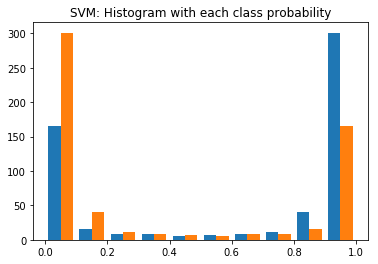

In [35]:
plt.hist(pro_svm, bins=[0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])  # arguments are passed to np.histogram
plt.title("SVM: Histogram with each class probability")
plt.show()

In [0]:
#probability of class 1
pro_svm_1=[]
for i in pro_svm:
    pro_svm_1.append(i[0])

In [37]:
hist_svm_1=np.histogram(pro_svm_1, bins =[0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])
hist_svm_1

(array([165,  15,   8,   8,   6,   7,   8,  11,  40, 301]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

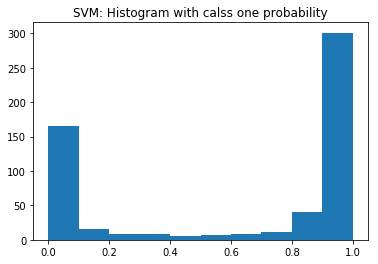

In [38]:
plt.hist(pro_svm_1, bins=[0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])
plt.title("SVM: Histogram with calss one probability")
plt.show()

In [61]:
#calculate the number of class1 and class2 after binning
class_svm_1=0
for i in pro_svm_1:
  if i>0.5:
    class_svm_1=class_svm_1+1

print("---class distribution after SVM disllation---")
print('class 1: ',class_svm_1)
class_svm_2=len(pro_svm_1)-class_svm_1
print('class_2: ',class_svm_2)

---class distribution after SVM disllation---
class 1:  367
class_2:  202


In [39]:
#new dataset
new_svm_y=[]
new_svm_X=X
for i in pro_svm:
    for j in range(11): 
        if not j==10:
            if i[0]>hist_svm_1[1][j] and i[0]<=hist_svm_1[1][j+1]: #i[0]=class 1 pro  hist[1]_1=class 1 bin edge
                class_svm_value=j+1  
                #print(class_value)
                new_svm_y.append(class_svm_value)
new_svm_y=np.array(new_y)
new_svm_y

array([ 1,  1,  1,  2,  1,  2,  1,  2,  1,  1,  2,  1,  1,  2,  1,  1,  1,
        1,  1, 10, 10, 10,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  2, 10,  3,  2, 10,  7,  1,  2,  2,  1, 10,  1, 10, 10, 10,
       10, 10,  1,  4, 10,  1,  1, 10, 10, 10, 10,  1, 10,  1,  1, 10, 10,
        9, 10,  1, 10,  1,  3, 10,  1, 10,  1,  1, 10, 10,  8,  1,  1, 10,
        1,  3,  1, 10,  9, 10,  4, 10, 10,  1,  1, 10, 10, 10,  2,  5, 10,
       10, 10, 10,  2, 10, 10,  1, 10, 10, 10,  8, 10, 10, 10, 10,  1,  1,
        1, 10,  1,  1, 10, 10, 10,  3,  1,  9,  1, 10,  1,  1,  6,  1,  4,
       10, 10,  1, 10, 10,  1, 10, 10, 10, 10,  2, 10,  9, 10, 10, 10,  7,
       10, 10, 10,  1,  4, 10, 10, 10,  1,  1, 10,  1, 10, 10,  1,  1, 10,
       10,  4,  1, 10, 10, 10, 10,  1, 10, 10,  1,  1,  1, 10,  6, 10,  1,
       10, 10, 10,  2,  9, 10,  2,  1, 10,  1,  2,  1,  1, 10,  1,  1,  1,
       10,  5, 10,  2, 10, 10,  1, 10,  1,  1,  1,  2, 10, 10,  1,  1, 10,
       10, 10,  1, 10,  8

In [41]:
print(new_svm_X.shape)
print(new_svm_y.shape)

(569, 30)
(569,)


In [42]:
#Decision Tree, Suppoort Vector Machine (SVM) distillation
#split data into 70% training and 30% testing set
X_svm_new_train, X_svm_new_test, y_svm_new_train, y_svm_new_test = train_test_split( new_svm_X, new_svm_y, test_size = 0.3, random_state = 100)

#create a svm classifer 
strat_svm=time.clock()
clf_svm_dt=DecisionTreeClassifier()
#Train the model using the training sets
clf_svm_dt.fit(X_svm_new_train, y_svm_new_train)
#Predicting for test dataset
y_pred_svm = clf_svm_dt.predict(X_svm_new_test)
end_svm=time.clock()
print('---Decision Tree, Suppoort Vector Machine (SVM) distillation-----')
print('time: ',end_svm-strat_svm)
#Evaluating
#Model Accuracy
print("Accuracy: ",metrics.accuracy_score(y_svm_new_test, y_pred_svm))
#score_svm=cross_val_score(clf_svm, X_svm_new_train, y_svm_new_train, cv=5)
print('cv_score: ',cross_val_score(clf_svm_dt, X_svm_new_train, y_svm_new_train, cv=5).mean())

---Decision Tree, Suppoort Vector Machine (SVM) distillation-----
time:  0.013860000000001094
Accuracy:  0.8187134502923976
cv_score:  0.8879911546970025


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [43]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
strat_nb=time.clock()
clf_nb = clf = GaussianNB()
clf_nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [44]:
#probability
pro_nb=clf_nb.predict_proba(X)
pro_nb

array([[4.72917125e-141, 1.00000000e+000],
       [1.67123760e-050, 1.00000000e+000],
       [7.83229169e-065, 1.00000000e+000],
       ...,
       [5.14126362e-011, 1.00000000e+000],
       [9.79309127e-105, 1.00000000e+000],
       [1.00000000e+000, 3.98363088e-017]])

In [52]:
hist_nb=np.histogram(pro_nb, bins=[0.,0.0001,0.02  ,0.2,0.5, 0.7 , 0.8 , 0.9 , 0.96,0.99, 1.  ])
hist_nb

(array([520,  28,  13,   8,   4,   4,   6,   6,  10, 539]),
 array([0.0e+00, 1.0e-04, 2.0e-02, 2.0e-01, 5.0e-01, 7.0e-01, 8.0e-01,
        9.0e-01, 9.6e-01, 9.9e-01, 1.0e+00]))

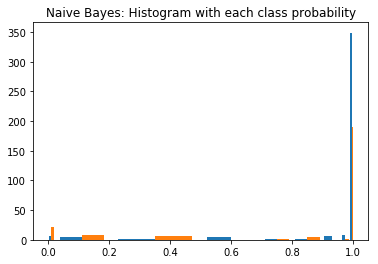

In [53]:
plt.hist(pro_nb, bins=[0.,0.0001,0.02  ,0.2,0.5, 0.7 , 0.8 , 0.9 , 0.96,0.99, 1.  ])  # arguments are passed to np.histogram
plt.title("Naive Bayes: Histogram with each class probability")
plt.show()

In [0]:
#probability of class 1
pro_nb_1=[]
for i in pro_nb:
    pro_nb_1.append(i[0])

In [55]:
hist_nb_1=np.histogram(pro_nb_1, bins =[0.,0.0001,0.02  ,0.2,0.5, 0.7 , 0.8 , 0.9 , 0.96,0.99, 1.  ])
hist_nb_1

(array([185,   7,   5,   2,   4,   2,   1,   6,   8, 349]),
 array([0.0e+00, 1.0e-04, 2.0e-02, 2.0e-01, 5.0e-01, 7.0e-01, 8.0e-01,
        9.0e-01, 9.6e-01, 9.9e-01, 1.0e+00]))

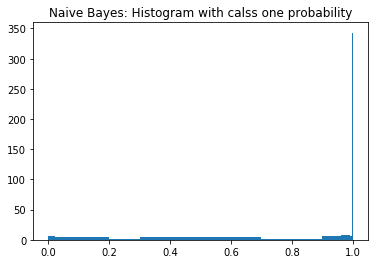

In [56]:
plt.hist(pro_nb_1, bins=[0.,0.0001,0.02  ,0.2, 0.3, 0.7 , 0.8 , 0.9 , 0.96,0.99,0.998, 1.  ])
plt.title("Naive Bayes: Histogram with calss one probability")
plt.show()

In [57]:
#calculate the number of class1 and class2 after binning
class_nb_1=0
for i in pro_nb_1:
  if i>0.5:
    class_nb_1=class_nb_1+1

print("---class distribution after NBE disllation---")
print('class 1: ',class_nb_1)
class_nb_2=len(pro_nb_1)-class_nb_1
print('class_2: ',class_nb_2)

---class distribution after NBE disllation---
class 1:  370
class_2:  199


In [58]:
#new dataset
new_nb_y=[]
new_nb_X=X
for i in pro_nb:
    for j in range(11): 
        if not j==10:
            if i[0]>hist_nb_1[1][j] and i[0]<=hist_nb_1[1][j+1]: #i[0]=class 1 pro  hist[1]_1=class 1 bin edge
                class_nb_value=j+1  
                #print(class_value)
                new_nb_y.append(class_nb_value)
new_nb_y=np.array(new_y)
new_nb_y

array([ 1,  1,  1,  2,  1,  2,  1,  2,  1,  1,  2,  1,  1,  2,  1,  1,  1,
        1,  1, 10, 10, 10,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  2, 10,  3,  2, 10,  7,  1,  2,  2,  1, 10,  1, 10, 10, 10,
       10, 10,  1,  4, 10,  1,  1, 10, 10, 10, 10,  1, 10,  1,  1, 10, 10,
        9, 10,  1, 10,  1,  3, 10,  1, 10,  1,  1, 10, 10,  8,  1,  1, 10,
        1,  3,  1, 10,  9, 10,  4, 10, 10,  1,  1, 10, 10, 10,  2,  5, 10,
       10, 10, 10,  2, 10, 10,  1, 10, 10, 10,  8, 10, 10, 10, 10,  1,  1,
        1, 10,  1,  1, 10, 10, 10,  3,  1,  9,  1, 10,  1,  1,  6,  1,  4,
       10, 10,  1, 10, 10,  1, 10, 10, 10, 10,  2, 10,  9, 10, 10, 10,  7,
       10, 10, 10,  1,  4, 10, 10, 10,  1,  1, 10,  1, 10, 10,  1,  1, 10,
       10,  4,  1, 10, 10, 10, 10,  1, 10, 10,  1,  1,  1, 10,  6, 10,  1,
       10, 10, 10,  2,  9, 10,  2,  1, 10,  1,  2,  1,  1, 10,  1,  1,  1,
       10,  5, 10,  2, 10, 10,  1, 10,  1,  1,  1,  2, 10, 10,  1,  1, 10,
       10, 10,  1, 10,  8

In [59]:
print(new_nb_X.shape)
print(new_nb_y.shape)

(569, 30)
(569,)


In [60]:
# Descision Tree, with Naive Bayes Estimation distillation
#split data into 70% training and 30% testing set
X_nb_new_train, X_nb_new_test, y_nb_new_train, y_nb_new_test = train_test_split( new_nb_X, new_nb_y, test_size = 0.3, random_state = 100)

#create a svm classifer 
start_nb_distill=time.clock()
clf_nb_dt=DecisionTreeClassifier()
#Train the model using the training sets
clf_nb_dt.fit(X_nb_new_train, y_nb_new_train)
#Predicting for test dataset
y_pred_nb_distill = clf_nb.predict(X_nb_new_test)
end_nb_distill=time.clock()
print('---Descision Tree, with Naive Bayes Estimation distillation-----')
print('time: ',end_nb_distill-start_nb_distill)
#Evaluating
print("Accuracy: ",metrics.accuracy_score(y_nb_new_test, y_pred_nb_distill))
print('cv_score: ',cross_val_score(clf_nb, X_nb_new_train, y_nb_new_train, cv=5).mean())

---Descision Tree, with Naive Bayes Estimation distillation-----
time:  0.014088999999998464
Accuracy:  0.04093567251461988
cv_score:  0.7990366475526629


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
